# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season 1:winter, 2:spring, 3:summer, 4:fall
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [11]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
import joblib
import plots
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('data/bike-sharing-hourly.csv')
df.shape

(17379, 17)

In [13]:
df['aux_actual_temp'] = df['temp'] * 41
df['aux_actual_atemp'] = df['atemp'] * 50

In [14]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aux_actual_temp,aux_actual_atemp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.395
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.635
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.635
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.395
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.395


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   dteday            17379 non-null  object 
 2   season            17379 non-null  int64  
 3   yr                17379 non-null  int64  
 4   mnth              17379 non-null  int64  
 5   hr                17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersit        17379 non-null  int64  
 10  temp              17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  hum               17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual            17379 non-null  int64  
 15  registered        17379 non-null  int64  
 16  cnt               17379 non-null  int64 

In [16]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [17]:
joblib.dump(df, 'joblib_files/dataset_initial.plk')

['joblib_files/dataset_initial.plk']

In [43]:
print(df.columns)   

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'aux_actual_temp', 'aux_actual_atemp'],
      dtype='object')


In [18]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- season: The data spans across all four seasons.
- yr: The dataset covers two years: 2011 and 2012.
- mnth: The data spans all 12 months.
- hr: The data covers all 24 hours of the day.
- holiday: Most of the records are for non-holidays.
- weekday: The data covers all days of the week.
- workingday: About 68% of the records are from working days.
- weathersit: Most days have clear or partly cloudy weather.
- temp & atemp: Temperatures range from 0.02 to 1 (normalized), with an average around 0.5.
- hum: The average humidity is around 63%.
- windspeed: Wind speeds vary, with an average around 19% (normalized).
- casual & registered: The number of casual users is significantly less than registered users on average.
- cnt: The total count of bike users ranges from 1 to 977, with a median of 142.

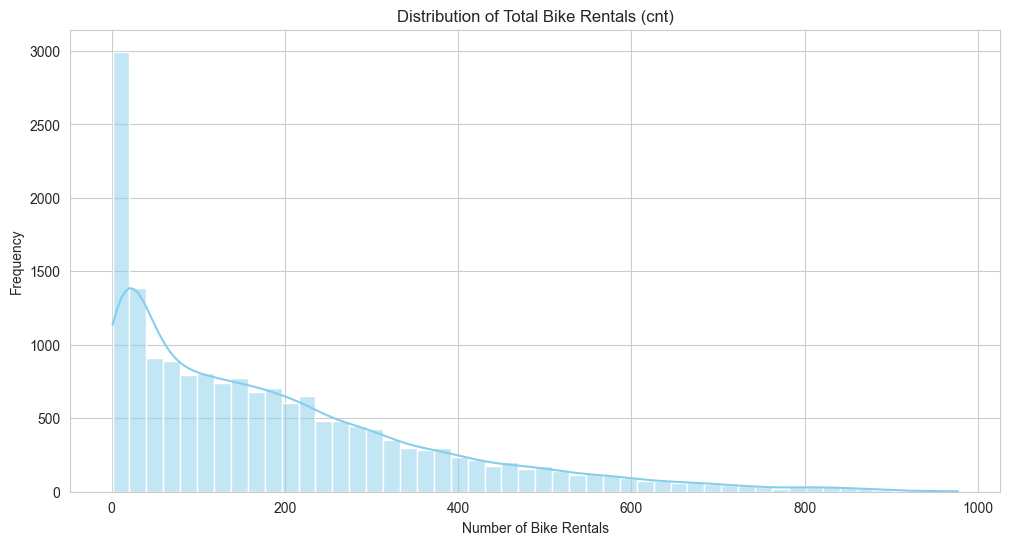

In [19]:
fig = plots.dist_total((12,6), df, 50)
fig.show()

* The distribution is right-skewed, meaning there are many hours with a relatively low number of rentals, but there are also a few peak hours with a high number of rentals.
* The most common range of bike rentals per hour seems to be around 0-100.
* There are some hours with rentals exceeding 800, which might indicate peak demand times.

In [20]:
fig_width = 14 * 96  # 1344 pixels
fig_height = 6 * 96  # 576 pixels
fig = plots.avg_bike_rental_hour(df, fig_width, fig_height)
fig.show()

* Working Days:
    * There are two peaks: one in the morning around 8 AM and another in the evening around 5-6 PM. This pattern likely corresponds to commute hours.
    * The demand is relatively lower during mid-day hours.
* Non-Working Days:
    * The demand for bikes rises gradually from the morning and peaks around 1-3 PM.
    * The pattern suggests a more relaxed and dispersed use throughout the day.

In [21]:
fig_width = 14 * 96  # 1344 pixels
fig_height = 6 * 96
fig = plots.circular_avg(df, fig_width, fig_height)
fig.show()

As we have observed before, commuting hours have the peak of rental bikes.

In [6]:
fig = plots.monthly_distribution(df, 1344, 576)
fig.show()

* The demand for bikes generally increases from January to June, peaking around the summer months (June/July).
* There's a decline in demand from July onwards, with the lowest demand during the winter months (December/January).
* Comparing the two years, 2012 generally had a higher demand than 2011 across all months. This could be due to increased popularity of the service, marketing efforts, or other external factors.

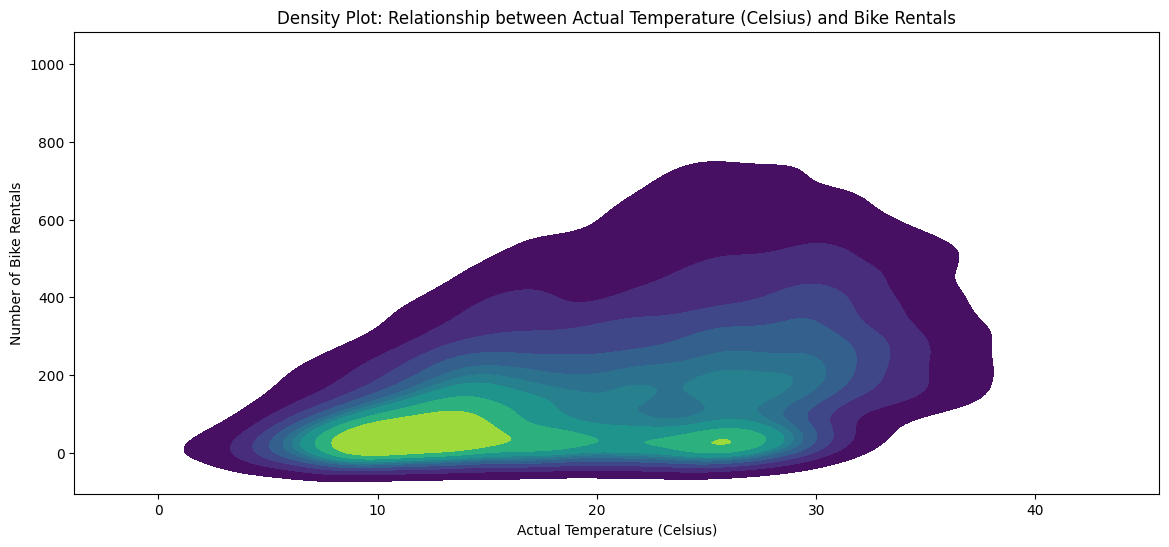

In [4]:
fig = plots.density_plot(df, (14, 6))
fig.show()

In [5]:
joblib.dump(fig, 'joblib_files/density.plk')

['joblib_files/density.plk']

* The darker regions represent higher densities of observations.
* The plot shows: as temperature increases, bike rentals also generally increase, with the highest density observed in the mid-temperature range.
* There's a significant concentration of rentals when the temperature is between approximately 15ºC and 30ºC.

In [8]:
aux_data = df.copy()
aux_data['aux_actual_temp'] = aux_data['temp'] * 41
aux_data['aux_actual_atemp'] = aux_data['atemp'] * 50
fig = plots.plotly_daily_trends(aux_data, 1600, 600)  # 16x6 inches at 100 PPI
fig.show()

* We observe a clear seasonal pattern, with peaks during the warmer months and troughs during colder months, consistent with our previous analyses.
* There's an upward trend from 2011 to 2012, indicating an increase in bike rentals over the years.
* There are some sporadic drops in rentals, possibly due to specific events, extreme weather conditions, or other external factors.

In [10]:
aux_data.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aux_actual_temp,aux_actual_atemp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.395
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.635
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.635
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.395
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.395


In [41]:
fig = plots.plotly_monthly_trends(aux_data, 1600, 600)  # 16x6 inches at 100 PPI
fig.show()

* The seasonality in bike rentals is evident, with higher rentals during warmer months and lower during colder months.
* For nearly every month, 2012 shows an increase in bike rentals compared to 2011.

In [32]:
initial_dataset = joblib.load('./joblib_files/dataset_initial.plk')

In [33]:
initial_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
fig = plots.plotly_seasonal_trends(aux_data, 1000, 600)  # 10x6 inches at 100 PPI
fig.show()

* **Spring:** sees the lowest average bike rentals. This could be due to the fact that early spring still has some cold days, affecting the overall average.
* **Summer:** has the highest average bike rentals, which aligns with our earlier observations about peak demand during warmer months.
* **Fall:** also has a relatively high demand, likely due to pleasant weather conditions.
* **Winter:** sees a drop in average rentals, but it's still higher than spring. This could be attributed to the mix of mild to very cold days during winter season in the dataset's location.

In [13]:
fig = plots.bike_rental_distribution(aux_data, 1600, 1200)  # Adjust width and height as needed
fig.show()

* Non-holidays have a higher average bike rental count compared to holidays
* The average bike rentals is fairly consistent during the week with a slight increment during Friday and the weekend.
* It is clear that the weather condition is crucial for the clients whether they want to rent a bike or not. The worse the weather conditions, the less average bike rentals.

In [54]:
fig = plots.temp_vs_bike_rentals_plotly(aux_data, 1500, 600)  # Adjust width and height as needed
fig.show()

* In these plots we confirm what we have seen in previous graphs. The temperature is directly connected with the bike rentals.

In [15]:
fig = plots.humidity_wind_speed_vs_bike_rentals_plotly(aux_data, 1500, 600)  # Adjust width and height as needed
fig.show()

Humidity vs. Bike Rentals:

   * The relationship with humidity doesn't seem strongly linear, but there is a slight tendency for rentals to decrease as humidity is either too low or too high.
   * The influence of different seasons remains visible, with higher humidity often associated with summer days.
    
Wind Speed vs. Bike Rentals:

   * There isn't a very strong trend visible between wind speed and bike rentals. However, extremely high wind speeds have fewer bike rentals, which is understandable as high winds can make biking challenging and less safe.

In [55]:
fig = plots.casual_vs_registered_histogram_plotly(aux_data, 1500, 600)  # Adjust width and height as needed
fig.show()

Casual Users:

   * The distribution for casual users is right-skewed, indicating that there are many instances with a lower number of casual users and fewer instances with a very high number of casual users.
   * The peak is evident near the lower end, showing that there are many hours with only a few casual users.

Registered Users:

   * The distribution for registered users is more spread out, with a visible mode around the mid-range. This suggests that registered users consistently use the bike-sharing service across various hours.

In [18]:
fig = plots.hourly_distribution_plotly(df, 1200, 700)  # Adjust width and height as needed
fig.show()

Registered Users:
   * There are two clear peaks for registered users: one in the morning (around 7-9 am) and another in the evening (around 5-7 pm). This pattern aligns with typical commuting hours, suggesting that many registered users use bike-sharing for daily commuting.
    
Casual Users:
   * Casual users display a different pattern. Their usage starts increasing from the late morning and peaks in the early afternoon, then gradually decreases as the evening approaches. This indicates that casual users might be using the bikes more for leisure rather than regular commuting.

## Correlation Analysis

In [18]:
fig, correlation_matrix = plots.correlation_heatmap(aux_data)
plt.show(fig)  # Display the figure

ValueError: could not convert string to float: '2011-01-01'

In [56]:
total_registered = df['registered'].sum()
total_cnt = df['cnt'].sum()

overall_percentage_registered = (total_registered / total_cnt) * 100
overall_percentage_registered

81.16983161735475

In [20]:
correlations_with_cnt = correlation_matrix['cnt'].drop('cnt').sort_values(ascending=False)

correlation_summary = pd.DataFrame(correlations_with_cnt).reset_index()
correlation_summary.columns = ['Feature', 'Correlation with Total Rentals (cnt)']

correlation_summary

,Feature,Correlation with Total Rentals (cnt)
0,registered,0.972151
1,casual,0.694564
2,aux_actual_temp,0.404772
3,temp,0.404772
4,atemp,0.400929
5,aux_actual_atemp,0.400929
6,hr,0.394071
7,instant,0.278379
8,dteday,0.277753
9,yr,0.250495


* registered and casual have the highest positive correlations with total bike rentals, as expected.
* Temperature variables (temp, atemp, and their actual values) also have strong positive correlations.
* Humidity (hum) has the most significant negative correlation, indicating that as humidity increases, bike rentals tend to decrease.

## Outliers

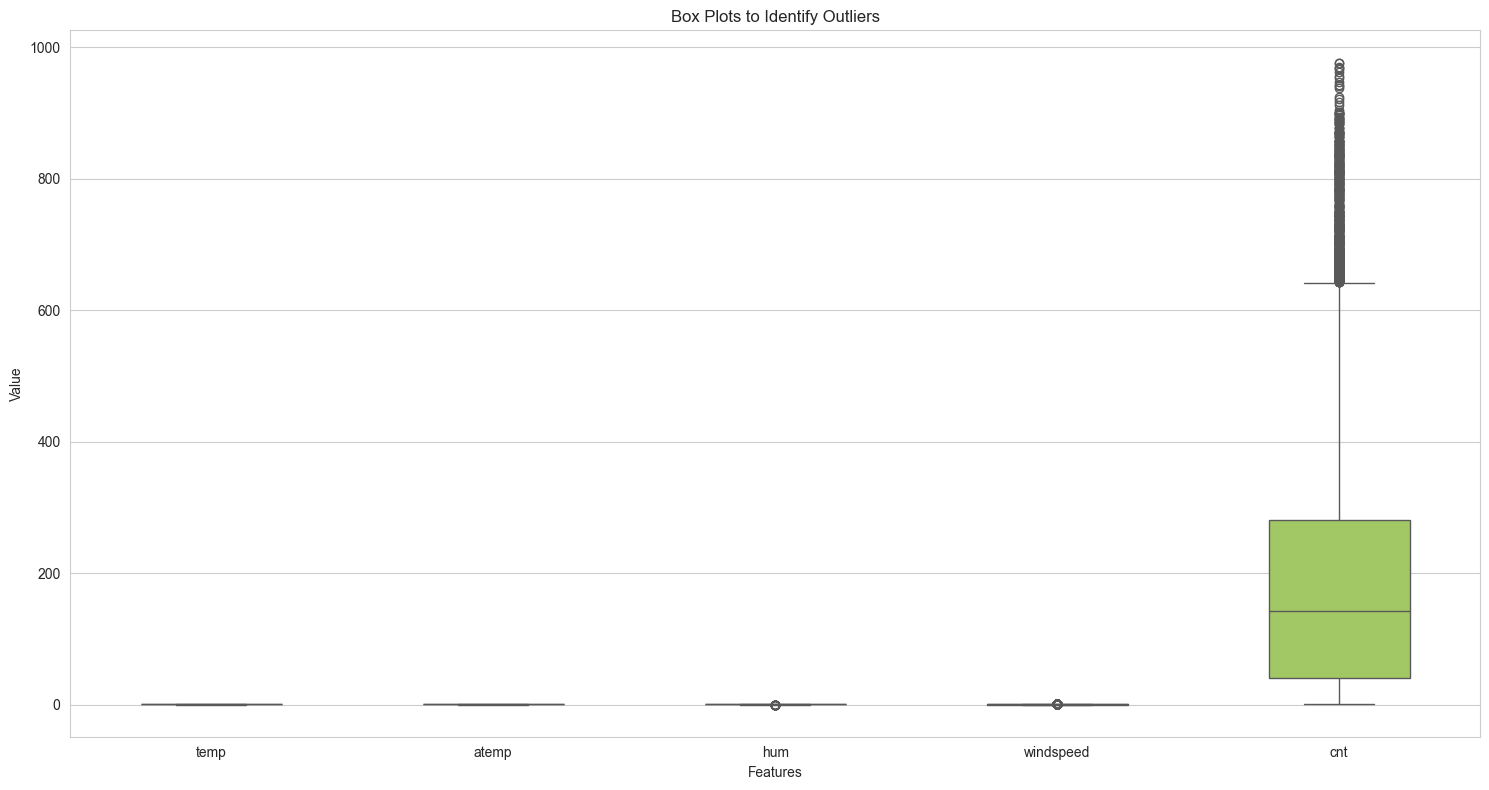

In [21]:
fig = plots.boxplot_features(aux_data, 15, 8)
plt.show(fig)  # Display the figure

Temperature (temp and atemp):
   * Both actual and feeling temperatures don't seem to have any visible outliers.
     
Humidity (hum):
   * There are some points below the lower whisker, indicating potential outliers with very low humidity values.
     
Wind Speed (windspeed):
   * There are some points above the upper whisker, indicating potential outliers with high wind speeds.
     
Total Bike Rentals (cnt):
   * There are a few points above the upper whisker, suggesting potential outliers with extremely high bike rentals.

In [20]:
outliers_dict = {}
columns_to_check = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for column in columns_to_check:
    Q1 = aux_data[column].quantile(0.25)
    Q3 = aux_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = aux_data[(aux_data[column] < lower_bound) | (aux_data[column] > upper_bound)]
    outliers_dict[column] = outliers[['dteday', 'hr', column]]

outliers_summary = {key: len(value) for key, value in outliers_dict.items()}

outliers_summary


{'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'cnt': 505}

We do not have potential outliers in neither *temp* nor *atemp*. However, we have **22** potential outliers in *hum*, **342** in *windspeed* and **505** in *cnt*.

In [30]:
data_outliers_handled = aux_data.copy()

median_hum = data_outliers_handled['hum'].median()
lower_bound_hum = outliers_dict['hum']['hum'].min()
upper_bound_hum = outliers_dict['hum']['hum'].max()
data_outliers_handled['hum'] = data_outliers_handled['hum'].apply(lambda x: median_hum if x < lower_bound_hum or x > upper_bound_hum else x)

lower_bound_ws = outliers_dict['windspeed']['windspeed'].min()
upper_bound_ws = outliers_dict['windspeed']['windspeed'].max()
data_outliers_handled['windspeed'] = data_outliers_handled['windspeed'].apply(lambda x: lower_bound_ws if x < lower_bound_ws else (upper_bound_ws if x > upper_bound_ws else x))

lower_bound_cnt = outliers_dict['cnt']['cnt'].min()
upper_bound_cnt = outliers_dict['cnt']['cnt'].max()
data_outliers_handled['cnt'] = data_outliers_handled['cnt'].apply(lambda x: lower_bound_cnt if x < lower_bound_cnt else (upper_bound_cnt if x > upper_bound_cnt else x))

data_outliers_handled[['hum', 'windspeed', 'cnt']].describe()


,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000
mean,0.629202,0.493612,646.087232
std,0.022401,0.012117,22.545530
min,0.000000,0.492500,643.000000
25%,0.630000,0.492500,643.000000
50%,0.630000,0.492500,643.000000
75%,0.630000,0.492500,643.000000
max,0.630000,0.850700,977.000000


* Humidity -> outlier has been replaced with the median value.
* WindSpeed -> we created a threshold, and we applied cap and floor.
* Total Bike Rentals -> We did the same, cap and floor creating a threshold.

In [31]:
data_outliers_handled['dteday'] = pd.to_datetime(data_outliers_handled['dteday'])

data_outliers_handled['week_of_year'] = data_outliers_handled['dteday'].dt.isocalendar().week
data_outliers_handled['quarter'] = data_outliers_handled['dteday'].dt.quarter

daylight_duration = {
    1: 10,  # January
    2: 11,  # February
    3: 12,  # March
    4: 13,  # April
    5: 14,  # May
    6: 15,  # June
    7: 15,  # July
    8: 14,  # August
    9: 13,  # September
    10: 12, # October
    11: 11, # November
    12: 10  # December
}
data_outliers_handled['approx_daylight_duration'] = data_outliers_handled['mnth'].map(daylight_duration)


In [32]:
data_outliers_handled[['dteday', 'week_of_year', 'quarter', 'approx_daylight_duration']].sample(5)

,dteday,week_of_year,quarter,approx_daylight_duration
7764,2011-11-25,47,4,11
2657,2011-04-25,17,2,13
2919,2011-05-06,18,2,14
11530,2012-04-30,18,2,13
2026,2011-03-30,13,1,12


In [33]:
data_outliers_handled.isna().sum()

instant                     0
dteday                      0
season                      0
yr                          0
mnth                        0
hr                          0
holiday                     0
weekday                     0
workingday                  0
weathersit                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
casual                      0
registered                  0
cnt                         0
aux_actual_temp             0
aux_actual_atemp            0
week_of_year                0
quarter                     0
approx_daylight_duration    0
dtype: int64

We do not have missing values in this dataset

In [34]:
# Rush hour between 7-9 am and 5-7 pm
data_outliers_handled['rush_hour'] = data_outliers_handled['hr'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

# Temperature difference
data_outliers_handled['temp_difference'] = data_outliers_handled['aux_actual_temp'] - data_outliers_handled['aux_actual_atemp']

# Display the first few rows of the dataset with the new features
data_outliers_handled[['dteday', 'hr', 'holiday', 'rush_hour', 'temp', 'atemp', 'temp_difference']].head()

,dteday,hr,holiday,rush_hour,temp,atemp,temp_difference
0,2011-01-01,0,0,0,0.24,0.2879,-4.555
1,2011-01-01,1,0,0,0.22,0.2727,-4.615
2,2011-01-01,2,0,0,0.22,0.2727,-4.615
3,2011-01-01,3,0,0,0.24,0.2879,-4.555
4,2011-01-01,4,0,0,0.24,0.2879,-4.555


In [35]:
# 1. Polynomial Features
data_outliers_handled['temp_squared'] = data_outliers_handled['temp'] ** 2
data_outliers_handled['atemp_squared'] = data_outliers_handled['atemp'] ** 2
data_outliers_handled['hum_squared'] = data_outliers_handled['hum'] ** 2
data_outliers_handled['windspeed_squared'] = data_outliers_handled['windspeed'] ** 2

# 2. Quantization
# Using KBinsDiscretizer to quantize 'temp' and 'hum' into 4 bins
k_bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
data_outliers_handled[['temp_quantized', 'hum_quantized']] = k_bins.fit_transform(data_outliers_handled[['temp', 'hum']])

# 3. Binarization
# Binarizing 'temp' and 'hum' based on their median values
binarizer_temp = Binarizer(threshold=data_outliers_handled['temp'].median())
binarizer_hum = Binarizer(threshold=data_outliers_handled['hum'].median())

data_outliers_handled['temp_binarized'] = binarizer_temp.transform(data_outliers_handled[['temp']])
data_outliers_handled['hum_binarized'] = binarizer_hum.transform(data_outliers_handled[['hum']])

# Displaying the first few rows with the new features
data_outliers_handled[['temp', 'temp_squared', 'temp_quantized', 'temp_binarized', 
      'hum', 'hum_squared', 'hum_quantized', 'hum_binarized']].head()

,temp,temp_squared,temp_quantized,temp_binarized,hum,hum_squared,hum_quantized,hum_binarized
0,0.24,0.0576,0.0,0.0,0.63,0.3969,0.0,0.0
1,0.22,0.0484,0.0,0.0,0.63,0.3969,0.0,0.0
2,0.22,0.0484,0.0,0.0,0.63,0.3969,0.0,0.0
3,0.24,0.0576,0.0,0.0,0.63,0.3969,0.0,0.0
4,0.24,0.0576,0.0,0.0,0.63,0.3969,0.0,0.0


In [36]:
joblib.dump(data_outliers_handled, './joblib_files/data_outliers.plk')

['./joblib_files/data_outliers.plk']

# Encoding

In [26]:
cat_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
non_categorical_vars = list(set(data_outliers_handled.columns) - set(cat_vars))

In [27]:
# 3) Define "model"
ohe = OneHotEncoder(sparse_output = False, drop = 'first')

# 4) Train "model"
encoded_features = ohe.fit_transform(data_outliers_handled[cat_vars])

# 5) "Predict"
dat_ohe = pd.DataFrame(ohe.transform(data_outliers_handled[cat_vars]))

# Optional
dat_ohe.columns = ohe.get_feature_names_out()

# Combine numerical and categorical
dat = pd.concat((data_outliers_handled[non_categorical_vars], dat_ohe), axis=1)
dat.head()

,hum_quantized,dteday,temp_quantized,hum_binarized,quarter,casual,atemp,windspeed,instant,week_of_year,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,2011-01-01,0.0,0.0,1,3,0.2879,0.4925,1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2011-01-01,0.0,0.0,1,8,0.2727,0.4925,2,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2011-01-01,0.0,0.0,1,5,0.2727,0.4925,3,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2011-01-01,0.0,0.0,1,3,0.2879,0.4925,4,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2011-01-01,0.0,0.0,1,0,0.2879,0.4925,5,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
def optimize_dtypes(df):
    for col in df.columns:
        col_dtype = df[col].dtype
        if col_dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif col_dtype == 'int64' or col_dtype == 'int32':
            df[col] = pd.to_numeric(df[col], downcast='integer')
    return df
optimize_dtypes(dat)

,hum_quantized,dteday,temp_quantized,hum_binarized,quarter,casual,atemp,windspeed,instant,week_of_year,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,2011-01-01,0.0,0.0,1,3,0.2879,0.4925,1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2011-01-01,0.0,0.0,1,8,0.2727,0.4925,2,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2011-01-01,0.0,0.0,1,5,0.2727,0.4925,3,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2011-01-01,0.0,0.0,1,3,0.2879,0.4925,4,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,2011-01-01,0.0,0.0,1,0,0.2879,0.4925,5,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,2012-12-31,0.0,0.0,4,11,0.2576,0.4925,17375,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
17375,0.0,2012-12-31,0.0,0.0,4,8,0.2576,0.4925,17376,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
17376,0.0,2012-12-31,0.0,0.0,4,7,0.2576,0.4925,17377,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17377,0.0,2012-12-31,0.0,0.0,4,13,0.2727,0.4925,17378,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
joblib.dump(dat, './joblib_files/data_processed.plk')

['./joblib_files/data_processed.plk']

## PART II: Prediction Model

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###